# Ransac

全名 random sample consensus， 通过使用观测数据来估计数学模型参数的迭代方法。 将数据点分为inlier 和 outlier。使用inlier 来估计模型参数。（对比最小二乘方法，是拟合所有的点）

算法步骤：
1） 随机选择样本子集，样本子集的数量是最小能估计模型参数的样本个数（例如拟合直线，至少需要两个点），通过子集拟合模型参数；
2） 计算数据集样本点和模型之间的偏差，如果偏差大于阈值，对应的样本为outlier。 用得到的inlier拟合迭代模型；
3） 一直迭代直到获得足够的inliers（有足够的点都是有“一致性”）； 

一些需要考虑的超参数：
// ToDo

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import random

In [4]:
import math

Text(0, 0.5, 'y')

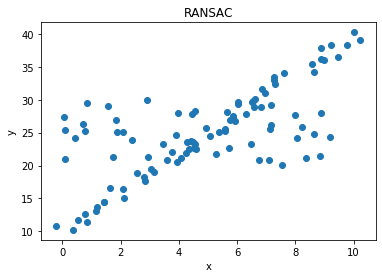

In [5]:
# 生成随机数据
SIZE = 50
X=np.linspace(0,10,SIZE)
Y=3*X+10
fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
ax1.set_title("RANSAC")

rx=[]
ry=[]

for i in range(SIZE):
    rx.append(X[i]+random.uniform(-0.5,0.5))
    ry.append(Y[i]+random.uniform(-0.5,0.5))
for i in range(SIZE):
    rx.append(random.uniform(0,10))
    ry.append(random.uniform(20,30))

rx=np.array(rx)
ry=np.array(ry)


ax1.scatter(rx, ry)
ax1.set_xlabel("x")
ax1.set_ylabel("y")

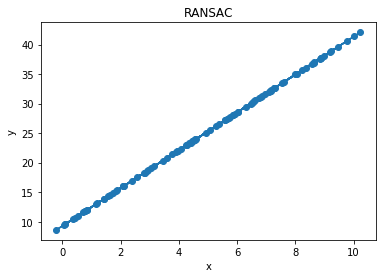

In [13]:
iter=1000
th=0.25
best_w=0
best_b=0
inliers_num=0
P=0.99

for i in range(iter):
    sample_index=random.sample(range(SIZE*2),2)
    w=(ry[sample_index[1]]-ry[sample_index[0]])/(rx[sample_index[1]]-rx[sample_index[0]])
    b=ry[sample_index[0]]-w*rx[sample_index[0]]
    total_inlier=0
    for index in range(SIZE*2):
        y_e = w * rx[index] +b
        if( abs(y_e-ry[index]) < th ):
            total_inlier+=1
    if total_inlier > inliers_num:
        iter = math.log(1-P)/math.log(1-pow(total_inlier / (SIZE*2),2))
        best_w = w
        best_b =b
    if total_inlier > SIZE:
        break

Y = best_w*rx+b

#print(rx)
#print(Y)

fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
ax1.set_title("RANSAC")
ax1.scatter(rx, Y)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.plot(rx, Y)
#text = "best_a = " + str(best_w) + "\nbest_b = " + str(best_b)
##plt.text(5,10, text,
##         fontdict={'size': 8, 'color': 'r'})
#plt.show()

In [14]:
import tensorflow as tf

/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [16]:
f=tf.constant([2,3,1,0])

In [19]:
embedding = tf.constant(
        [[0.21,0.41,0.51,0.11],
        [0.22,0.42,0.52,0.12],
        [0.23,0.43,0.53,0.13],
        [0.24,0.44,0.54,0.14]],dtype=tf.float32)

In [20]:
get_embedding1 = tf.nn.embedding_lookup(embedding,f)

In [21]:
get_embedding1

<tf.Tensor 'embedding_lookup/Identity:0' shape=(4, 4) dtype=float32>

In [23]:
with tf.Session() as sess:
    print(sess.run(get_embedding1))

[[0.23 0.43 0.53 0.13]
 [0.24 0.44 0.54 0.14]
 [0.22 0.42 0.52 0.12]
 [0.21 0.41 0.51 0.11]]
